Пусть дана система

$dx = \sigma (y-x),$

$dy = x (r-z) - y,$

$dz = xy - \beta z, $

где $\sigma$, $\beta$ и $r$ — постоянные параметры.

Решите данную систему, используя параметры $r = 28, \sigma = 10$ и $\beta = 8/3$.

Сравните решения, полученные с помощью встроенной функции `solve_ivp` решения ОДУ в Python с решением, полученным с помощью Вашей реализации [метода Рунге-Кутты](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B) 4го порядка.

В качестве трех исходных приближений используйте $x = 0, y = 1, z = 20$.

Визуализируйте полученные решения.


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def system_de(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]

In [ ]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
 
parameters = (sigma, beta, rho)
 
y0 = [0.0, 1.0, 20.0]
t_span = (0.0, 40.0)

In [ ]:
ans_solve_ivp = solve_ivp(system_de, t_span, y0, args=parameters, t_eval=np.linspace(0,40,2000))
ans_solve_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.001e-02 ...  3.998e+01  4.000e+01]
        y: [[ 0.000e+00  1.805e-01 ...  1.599e+01  1.713e+01]
            [ 1.000e+00  9.963e-01 ...  2.306e+01  2.115e+01]
            [ 2.000e+01  1.896e+01 ...  2.948e+01  3.515e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4100
     njev: 0
      nlu: 0

Text(0.5, 0.92, 'solve_ivp')

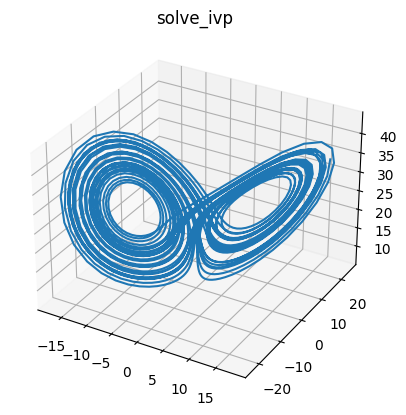

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ans_solve_ivp.y[0, :],
        ans_solve_ivp.y[1, :],
        ans_solve_ivp.y[2, :])
ax.set_title("solve_ivp")


In [ ]:
# Диффер. уравнение
def foo(x, y):
    return -y + np.cos(x)
 
# Решение Дифф уравнение
#def solution(x):
    #return np.sin(x)/2 + np.cos(x)/2 + 1/np.exp(x)
 
 
def runge(f, x_0, y_0, a, b, h=0.1, cor=False):
 
    x = x_0
    y = y_0
    n = int((b - a)/h) + 1
    print('Step:', h)
    sol = {}
    for i in range(n):
        K1 = h * f(x, y)
        K2 = h * f(x + h / 2, y + K1 / 2)
        K3 = h * f(x + h / 2, y + K2 / 2)
        K4 = h * f(x + h, y + K3)
 
        if cor:
            if i == 0:
                theta = abs((K2 - K3) / (K1 - K2))
                print('THETA', theta)
            if theta > 0.033:
                return runge(f, x_0, y_0, a, b, h=h / 2)
 
 
        # print(x, y)
        sol[x] = y
        x = x + h
        delta_y = (K1 + 2*K2 + 2*K3 + K4) / 6
        y = y + delta_y
    return sol
 
 
a = 0
b = np.pi
h = 0.1
# Краевые условия
y_0 = 0.5
x_0 = 0
 
xs = np.arange(a, b+h, h)
ys = runge(foo, x_0, y_0, a, b, h=h)
print(ys)
plt.plot(xs, list(ys.values()))
ys = runge(foo, x_0, y_0, a, b, h=h, cor=True)
xs = np.arange(a, b+0.15, 0.15)
plt.plot(xs, list(ys.values()))
plt.plot(xs, [solution(i) for i in xs])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['h=0.1', 'h=0.15', 'Точний'])
plt.show()
0